In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from keras.datasets import cifar10




In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow import keras 
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
from __future__ import print_function
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers  import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D 
import os 
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam 

In [ ]:
from keras.optimizers import rmsprop_v2

In [ ]:
!unizp 

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


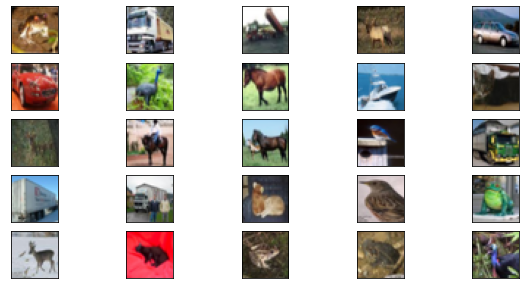

In [ ]:
plt.figure(figsize=(50,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
 
plt.show()

In [ ]:
print("X train shape: ",x_train.shape)
print("Y train shape: ",y_train.shape)
print("X test shape: ",x_test.shape)
print("Y test shape: ",y_test.shape)

X train shape:  (50000, 32, 32, 3)
Y train shape:  (50000, 1)
X test shape:  (10000, 32, 32, 3)
Y test shape:  (10000, 1)


In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape) 
print(x_train.shape[0], 'train samples') 
print(x_test.shape[0], 'test samples') 



x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255 

In [ ]:
import os
batch_size = 32 
num_classes = 10 
epochs = 100
num_predictions = 20 
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5' 

In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes) 
y_test = keras.utils.to_categorical(y_test, num_classes) 

Архитектура СНС

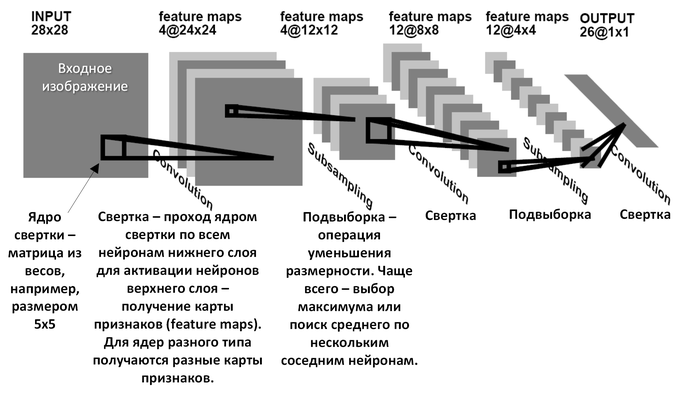

In [ ]:
model_2dc = Sequential() # Создаём свёрточную сеть
# Добавляем свёрточнный слой на 32 нейрона (фильтра, ядра), матрица 3x3 с relu-активацией
model_2dc.add(Conv2D(32, (3,3), padding = 'same', input_shape=(x_train.shape[1:]), activation="relu"))
model_2dc.add(MaxPooling2D()) # пулинг слой уменьшения размерности Dropout, BatchNormalization
model_2dc.add(Dropout(0.5)) # слои регуляризации
model_2dc.add(BatchNormalization())
model_2dc.add(Flatten()) # Вытягиваем данные в одномерный вектор только для классификационного слоя
model_2dc.add(Dense(512, activation="relu")) # Добавляем полносвязный слой на 400 нейронов с relu-активацией
model_2dc.add(Dense(num_classes,activation="softmax"))# Выходной  на 10 классов 
model_2dc.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0005), metrics=["accuracy"]) # Компилируем модель

print(model_2dc.summary()) #Вывод структуры модели


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 batch_normalization_5 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                                 
                                                                 
 flatten_5 (Flatten)         (None, 8192)              0         
                                                                 
 dense_12 (Dense)            (None, 512)              

In [ ]:
model_2dc.fit(x_train, 	y_train, 	batch_size=batch_size, 	epochs=epochs, validation_data=(x_test, y_test),   shuffle=True) 


Epoch 1/100
1563/1563 [==============================] - 128s 82ms/step - loss: 1.4110 - accuracy: 0.5017 - val_loss: 1.1129 - val_accuracy: 0.6056
Epoch 2/100
1563/1563 [==============================] - 123s 78ms/step - loss: 1.0693 - accuracy: 0.6215 - val_loss: 1.1184 - val_accuracy: 0.6042
Epoch 3/100
1563/1563 [==============================] - 129s 82ms/step - loss: 0.9056 - accuracy: 0.6787 - val_loss: 1.0254 - val_accuracy: 0.6489
Epoch 4/100
1563/1563 [==============================] - 120s 77ms/step - loss: 0.7668 - accuracy: 0.7298 - val_loss: 0.9745 - val_accuracy: 0.6697
Epoch 5/100
1563/1563 [==============================] - 128s 82ms/step - loss: 0.6527 - accuracy: 0.7721 - val_loss: 0.9788 - val_accuracy: 0.6686
Epoch 6/100
1563/1563 [==============================] - 124s 79ms/step - loss: 0.5558 - accuracy: 0.8042 - val_loss: 0.9812 - val_accuracy: 0.6819
Epoch 7/100
1563/1563 [==============================] - 128s 82ms/step - loss: 0.4787 - accuracy: 0.8318 - val_

In [ ]:
scores=model_2dc.evaluate(x_test, y_test, verbose=0) 
print("Baseline Error: %.2f%%" % (100-scores[1]*100)) 


Baseline Error: 31.34%


In [ ]:
import numpy as np


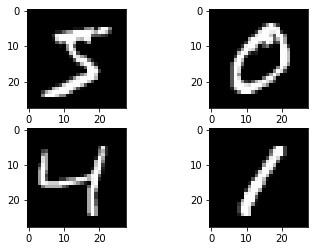

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt 
(X_train1, y_train1), (X_test1, y_test1) = keras.datasets.mnist.load_data() 
# plot 4 images as gray 
plt.subplot(221) 
plt.imshow(X_train1[0], cmap=plt.get_cmap('gray')) 
plt.subplot(222) 
plt.imshow(X_train1[1], cmap=plt.get_cmap('gray'))
plt.subplot(223) 
plt.imshow(X_train1[2], cmap=plt.get_cmap('gray'))
plt.subplot(224) 
plt.imshow(X_train1[3], cmap=plt.get_cmap('gray')) 
# show the plot plt.show() 


In [ ]:
from keras.utils.np_utils import to_categorical

In [ ]:
print("X train shape: ",X_train1.shape)
print("Y train shape: ",y_train1.shape)
print("X test shape: ",X_test1.shape)
print("Y test shape: ",y_test1.shape)

X train shape:  (60000, 28, 28)
Y train shape:  (60000,)
X test shape:  (10000, 28, 28)
Y test shape:  (10000,)


In [ ]:
X_train1= X_train1.reshape(X_train1.shape[0], 28, 28, 1)
X_test1 = X_test1.reshape(X_test1.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
X_train1 = X_train1.astype('float32')
X_test1 = X_test1.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
X_train1 /= 255
X_test1 /= 255
print('x_train shape:', X_train1.shape)
print('Number of images in x_train', X_train1.shape[0])
print('Number of images in x_test', X_test1.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [ ]:
from keras.layers import Dropout 
from keras.layers.convolutional import Conv2D 


In [ ]:
num_pixels

784

In [ ]:
import gc # для очистки памяти от лишних данных

In [ ]:
gc.collect() # очищаем память от лишнего, чтобы памяти было достаточно для нейросети

0

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [ ]:
model= Sequential() # Создаём свёрточную сеть 
model.add(Conv2D(32, 3, padding = 'same', input_shape=(input_shape), activation="relu"))# Добавляем свёрточнный слой на 32 нейрона (фильтра, ядра), матрица 3x3 с relu-активацией
model.add(MaxPooling2D()) # пулинг слой уменьшения размерности Dropout, BatchNormalization
model.add(Dropout(0.5)) # слои регуляризации
model.add(BatchNormalization())
model.add(Flatten()) # Вытягиваем данные в одномерный вектор только для классификационного слоя
model.add(Dense(500, activation="relu")) # Добавляем полносвязный слой на 400 нейронов с relu-активацией
model.add(Dense(10, activation="softmax")) # Добавляем полносвязный слой на 10 нейронов с softmax-активацией



In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])



In [ ]:
model.fit(x=X_train1,y=y_train1, epochs=10)

Epoch 1/10
 435/1875 [=====>........................] - ETA: 1:19 - loss: 0.2949 - accuracy: 0.9119

KeyboardInterrupt: ignored

In [ ]:
model.fit(X_train1, 	y_train1, 	validation_data=(X_test1, 	y_test1), 	epochs=10, batch_size=200) 

Epoch 1/10
300/300 [==============================] - 63s 209ms/step - loss: 0.0890 - accuracy: 0.9731 - val_loss: 0.0497 - val_accuracy: 0.9844
Epoch 2/10
300/300 [==============================] - 65s 215ms/step - loss: 0.0520 - accuracy: 0.9834 - val_loss: 0.0386 - val_accuracy: 0.9876
Epoch 3/10
300/300 [==============================] - 62s 207ms/step - loss: 0.0370 - accuracy: 0.9882 - val_loss: 0.0399 - val_accuracy: 0.9872
Epoch 4/10
300/300 [==============================] - 61s 203ms/step - loss: 0.0287 - accuracy: 0.9910 - val_loss: 0.0333 - val_accuracy: 0.9897
Epoch 5/10
300/300 [==============================] - 63s 211ms/step - loss: 0.0251 - accuracy: 0.9917 - val_loss: 0.0348 - val_accuracy: 0.9884
Epoch 6/10
300/300 [==============================] - 62s 205ms/step - loss: 0.0206 - accuracy: 0.9930 - val_loss: 0.0344 - val_accuracy: 0.9898
Epoch 7/10
300/300 [==============================] - 63s 211ms/step - loss: 0.0186 - accuracy: 0.9940 - val_loss: 0.0382 - val_ac

In [ ]:
scores = model.evaluate(X_test1, y_test1, verbose=0) 
print("Baseline Error: %.2f%%" % (100-scores[1]*100)) 


Baseline Error: 1.06%
